In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm



In [201]:
df=pd.read_csv(r"D:\New Volume\Data Analysis\Predicting house prices.csv")

In [203]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,"313,000.00",3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,"2,384,000.00",5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,"342,000.00",3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,"420,000.00",3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,"550,000.00",4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,"308,166.67",3.00,1.75,1510,6360,1.00,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,"534,333.33",3.00,2.50,1460,7573,2.00,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,"416,904.17",3.00,2.50,3010,7014,2.00,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,"203,400.00",4.00,2.00,2090,6630,1.00,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [205]:
pd.options.display.float_format = '{:,.2f}'.format
df['price']

0        313,000.00
1      2,384,000.00
2        342,000.00
3        420,000.00
4        550,000.00
           ...     
4595     308,166.67
4596     534,333.33
4597     416,904.17
4598     203,400.00
4599     220,600.00
Name: price, Length: 4600, dtype: float64

In [207]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [209]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [211]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,"4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00"
mean,"551,962.99",3.40,2.16,"2,139.35","14,852.52",1.51,0.01,0.24,3.45,"1,827.27",312.08,"1,970.79",808.61
std,"563,834.70",0.91,0.78,963.21,"35,884.44",0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,"1,900.00",0.00
25%,"322,875.00",3.00,1.75,"1,460.00","5,000.75",1.00,0.00,0.00,3.00,"1,190.00",0.00,"1,951.00",0.00
50%,"460,943.46",3.00,2.25,"1,980.00","7,683.00",1.50,0.00,0.00,3.00,"1,590.00",0.00,"1,976.00",0.00
75%,"654,962.50",4.00,2.50,"2,620.00","11,001.25",2.00,0.00,0.00,4.00,"2,300.00",610.00,"1,997.00","1,999.00"
max,"26,590,000.00",9.00,8.00,"13,540.00","1,074,218.00",3.50,1.00,4.00,5.00,"9,410.00","4,820.00","2,014.00","2,014.00"


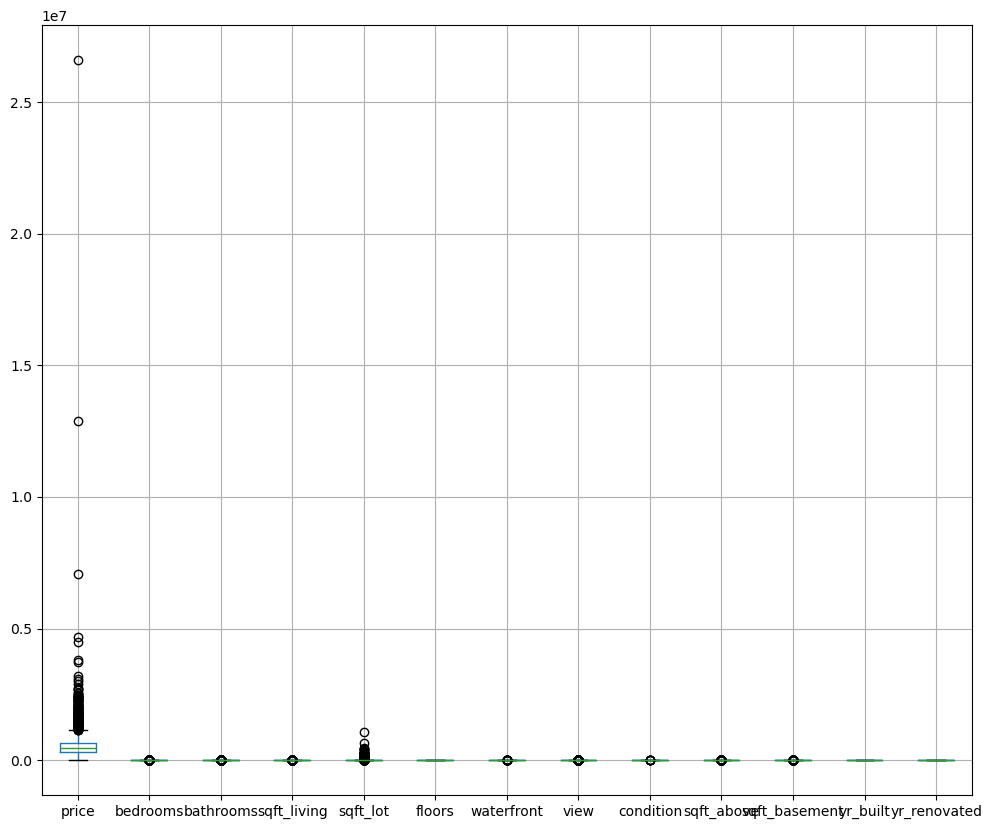

In [213]:
plt.figure(figsize=(12, 10))
df.boxplot()
plt.show()

In [215]:
df=df.drop(columns=['street','date','statezip','country'])

In [217]:
df['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [219]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Columns to standardize
columns_to_scale = ['sqft_living', 'sqft_lot','sqft_above',
       'sqft_basement']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df)

            price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      313,000.00      3.00       1.50        -0.83     -0.19    1.50   
1    2,384,000.00      5.00       2.50         1.57     -0.16    2.00   
2      342,000.00      3.00       2.00        -0.22     -0.08    1.00   
3      420,000.00      3.00       2.25        -0.14     -0.19    1.00   
4      550,000.00      4.00       2.50        -0.21     -0.12    1.00   
...           ...       ...        ...          ...       ...     ...   
4595   308,166.67      3.00       1.75        -0.65     -0.24    1.00   
4596   534,333.33      3.00       2.50        -0.71     -0.20    2.00   
4597   416,904.17      3.00       2.50         0.90     -0.22    2.00   
4598   203,400.00      4.00       2.00        -0.05     -0.23    1.00   
4599   220,600.00      3.00       2.50        -0.67     -0.19    2.00   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3       -0.57    

In [221]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

In [223]:
df=df.drop(columns=['city'])

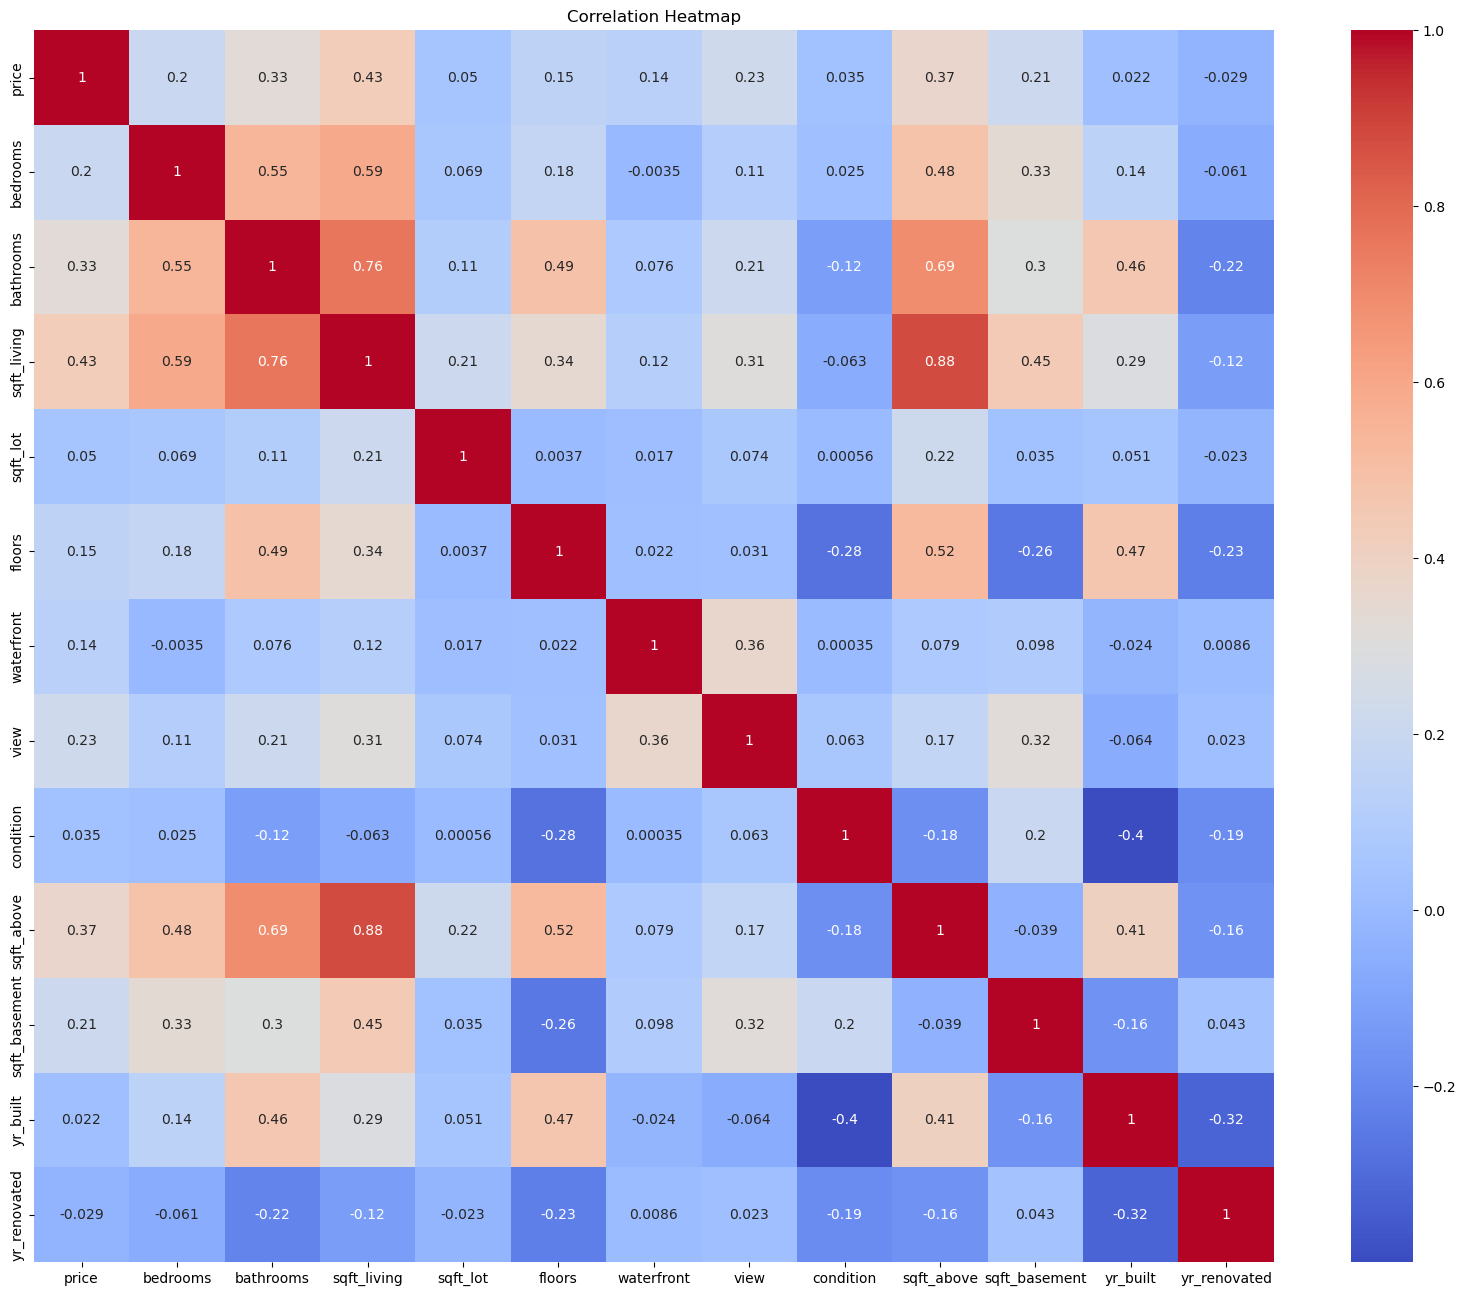

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(20, 16))  # Adjust the width and height as needed

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()


In [227]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,"4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00","4,600.00"
mean,"551,962.99",3.40,2.16,-0.00,-0.00,1.51,0.01,0.24,3.45,-0.00,-0.00,"1,970.79",808.61
std,"563,834.70",0.91,0.78,1.00,1.00,0.54,0.08,0.78,0.68,1.00,1.00,29.73,979.41
min,0.00,0.00,0.00,-1.84,-0.40,1.00,0.00,0.00,1.00,-1.69,-0.67,"1,900.00",0.00
25%,"322,875.00",3.00,1.75,-0.71,-0.27,1.00,0.00,0.00,3.00,-0.74,-0.67,"1,951.00",0.00
50%,"460,943.46",3.00,2.25,-0.17,-0.20,1.50,0.00,0.00,3.00,-0.28,-0.67,"1,976.00",0.00
75%,"654,962.50",4.00,2.50,0.50,-0.11,2.00,0.00,0.00,4.00,0.55,0.64,"1,997.00","1,999.00"
max,"26,590,000.00",9.00,8.00,11.84,29.52,3.50,1.00,4.00,5.00,8.80,9.71,"2,014.00","2,014.00"


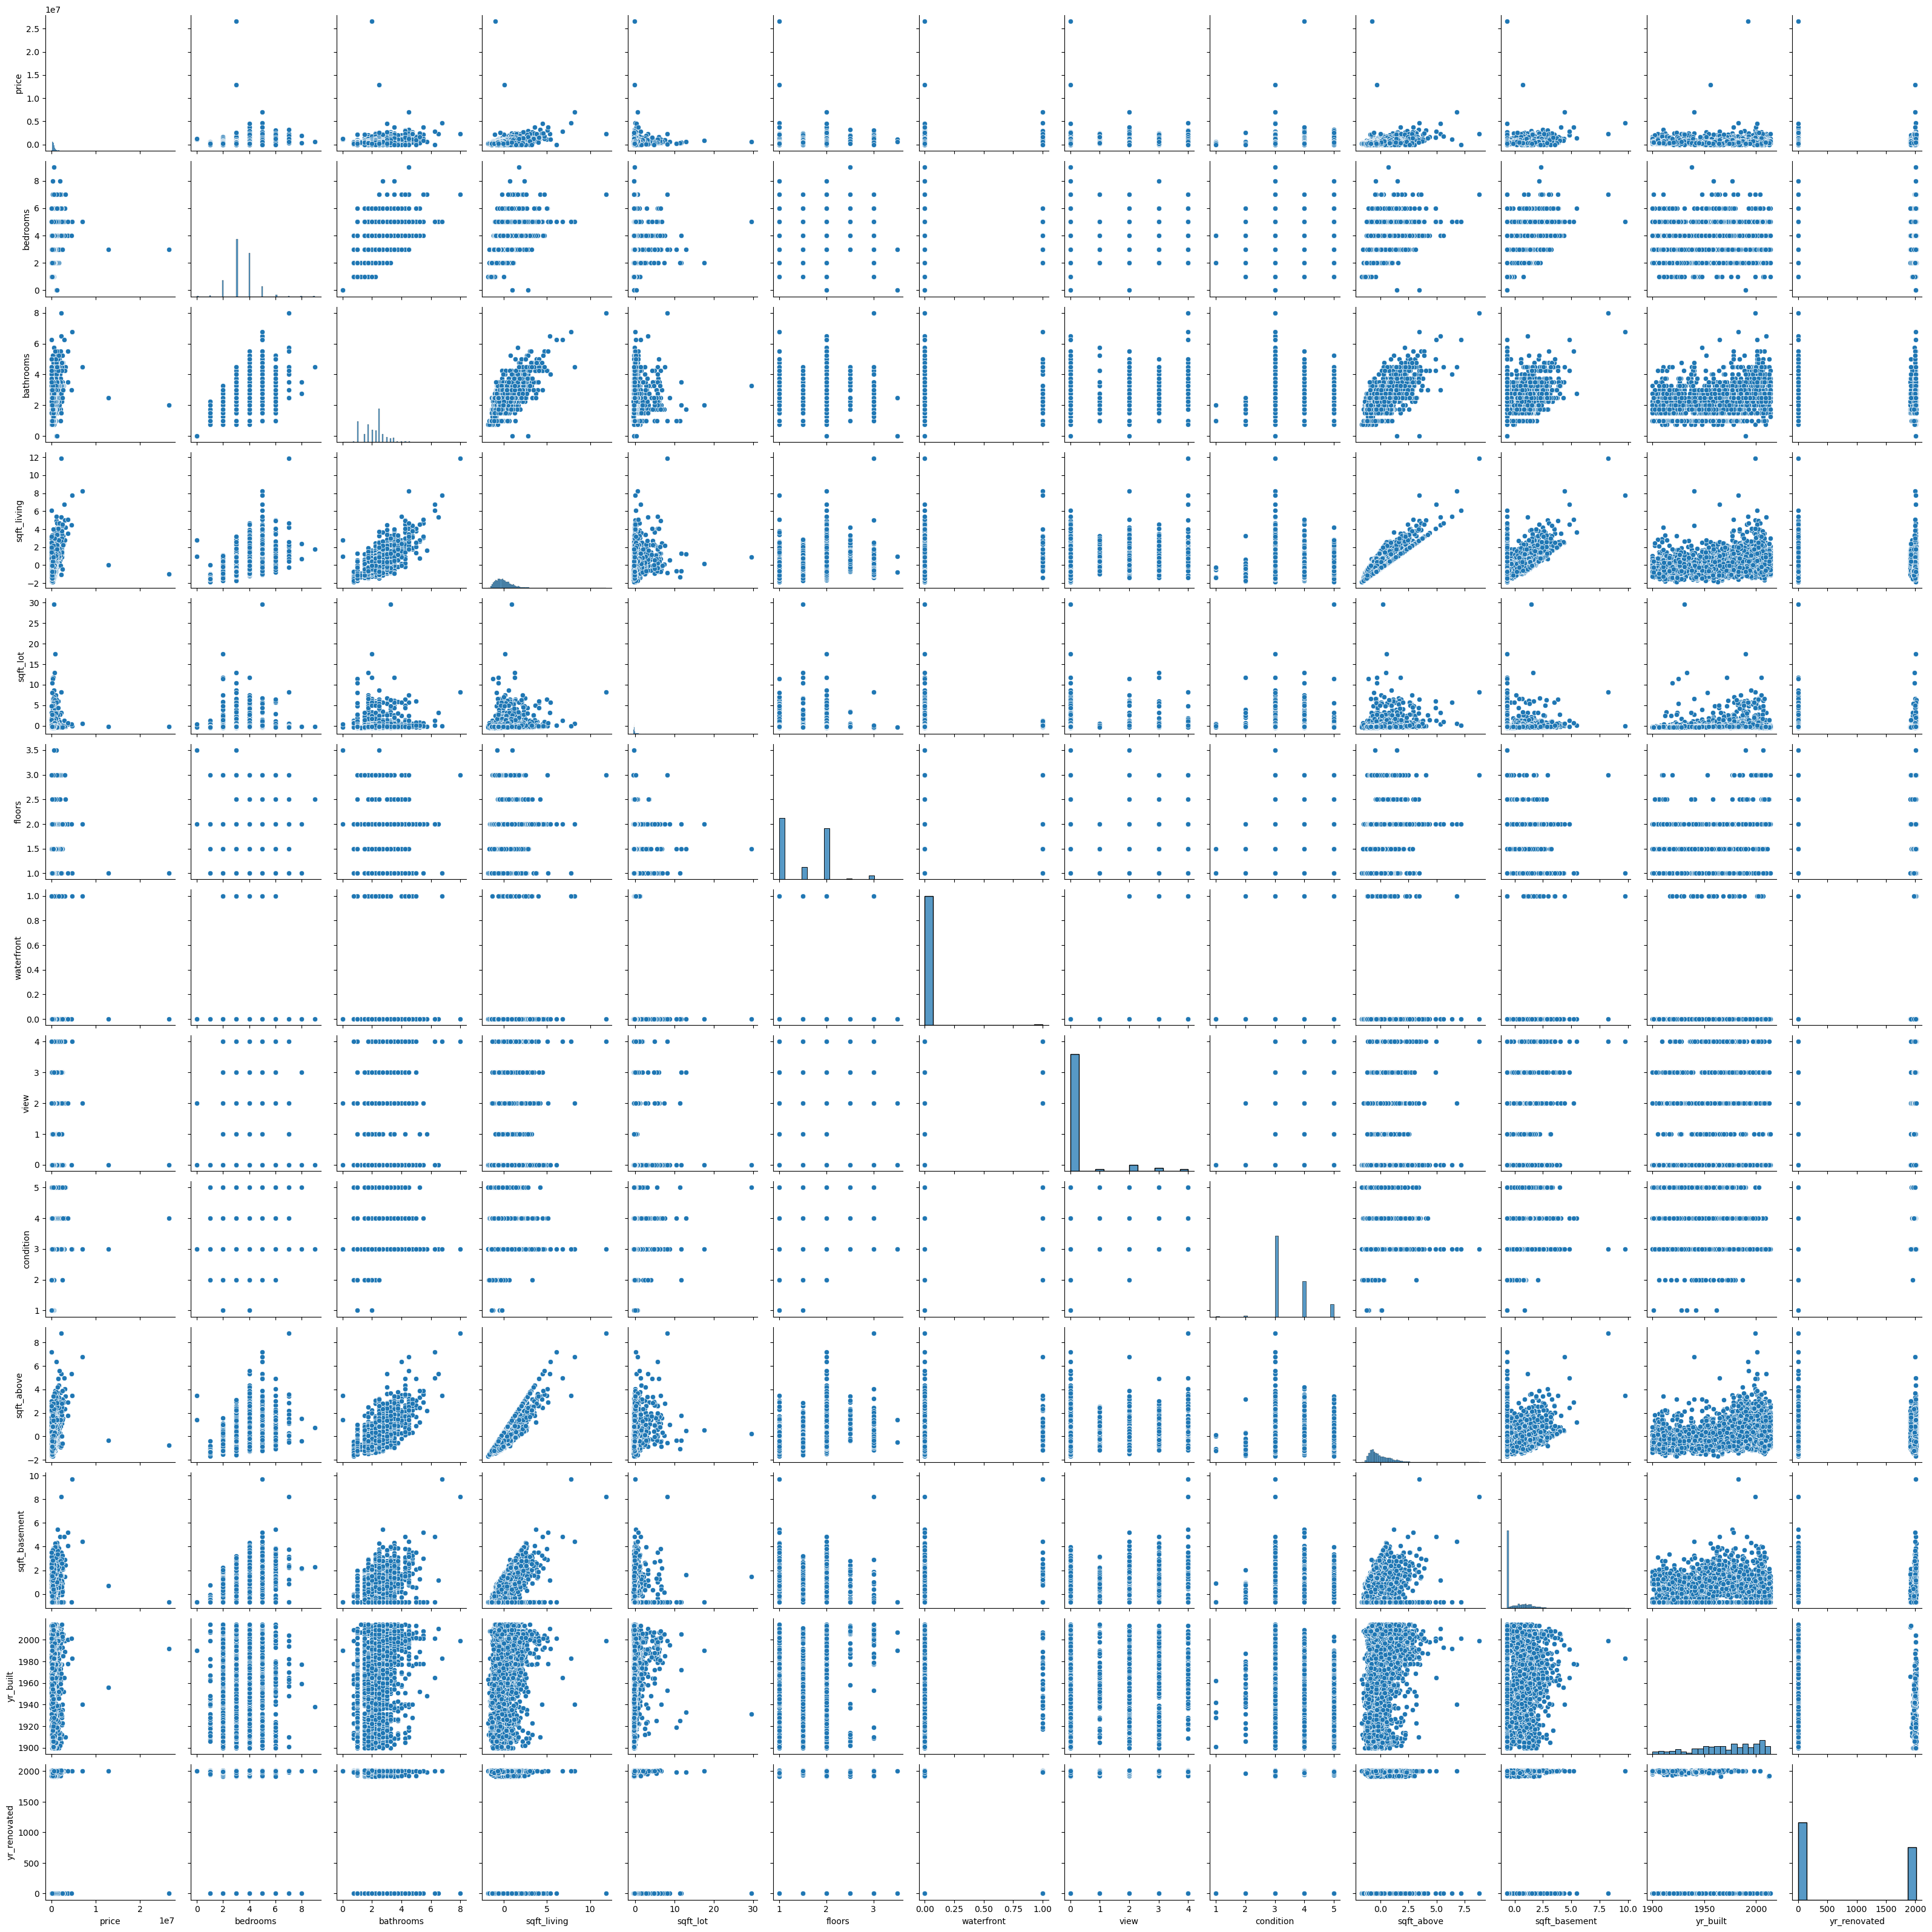

In [229]:
sns.pairplot(df) 
plt.show()

In [230]:
import pandas as pd


# Bin the 'price' column into two categories
df['price_category'] = pd.cut(df['price'], bins=[-float('inf'), 550000, float('inf')], labels=['Less than 550000', 'More than 550000'])

print(df)


            price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      313,000.00      3.00       1.50        -0.83     -0.19    1.50   
1    2,384,000.00      5.00       2.50         1.57     -0.16    2.00   
2      342,000.00      3.00       2.00        -0.22     -0.08    1.00   
3      420,000.00      3.00       2.25        -0.14     -0.19    1.00   
4      550,000.00      4.00       2.50        -0.21     -0.12    1.00   
...           ...       ...        ...          ...       ...     ...   
4595   308,166.67      3.00       1.75        -0.65     -0.24    1.00   
4596   534,333.33      3.00       2.50        -0.71     -0.20    2.00   
4597   416,904.17      3.00       2.50         0.90     -0.22    2.00   
4598   203,400.00      4.00       2.00        -0.05     -0.23    1.00   
4599   220,600.00      3.00       2.50        -0.67     -0.19    2.00   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3       -0.57    

In [231]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'price_category' column
df['price_category'] = label_encoder.fit_transform(df['price_category'])

print(df)


            price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      313,000.00      3.00       1.50        -0.83     -0.19    1.50   
1    2,384,000.00      5.00       2.50         1.57     -0.16    2.00   
2      342,000.00      3.00       2.00        -0.22     -0.08    1.00   
3      420,000.00      3.00       2.25        -0.14     -0.19    1.00   
4      550,000.00      4.00       2.50        -0.21     -0.12    1.00   
...           ...       ...        ...          ...       ...     ...   
4595   308,166.67      3.00       1.75        -0.65     -0.24    1.00   
4596   534,333.33      3.00       2.50        -0.71     -0.20    2.00   
4597   416,904.17      3.00       2.50         0.90     -0.22    2.00   
4598   203,400.00      4.00       2.00        -0.05     -0.23    1.00   
4599   220,600.00      3.00       2.50        -0.67     -0.19    2.00   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3       -0.57    

In [232]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'price_category'],
      dtype='object')

In [233]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']]
y = df['price_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.7652173913043478
Confusion Matrix:
[[503  78]
 [138 201]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       581
           1       0.72      0.59      0.65       339

    accuracy                           0.77       920
   macro avg       0.75      0.73      0.74       920
weighted avg       0.76      0.77      0.76       920



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
